## Assignment 1

-----------------------------------------

#### 1. Building and Analyzing Word Vectors with Word2Vec (20 Points)

- **Task**: Create word vectors using the Word2Vec model on a selected corpus.
- **Visualization**: Utilize PCA or t-SNE for visualizing these vectors in 2D.
- **Analysis**: Discuss the word relationships and clusters formed.

Firstly, we import necessary libraries, which includes **GENSIM**, a library that's widely used for training and using models like **Word2Vec**.

In [1]:
import gensim
import gensim.downloader as api
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

For corpus, we will choose to use **text8**. It has first billion characters from wikipedia (clean data), can be used in **Word2Vec**, etc. It has been preprocessed and formatted as a single continuous line of text.

In [2]:
corpus = api.load('text8')

[==================================================] 100.0% 31.6/31.6MB downloaded


Now, we could create **Word2Vec** model and see its vector size and vocabulary size.
- We can use `model.wv` to access the word vectors, where 'wv' stands for 'word vectors'.

In [3]:
text8_model = Word2Vec(corpus)
print(f"Text8's vector size is: {text8_model.vector_size}.")
print(f"Text8's vocabulary size is: {len(text8_model.wv.key_to_index)} words.")

Text8's vector size is: 100.
Text8's vocabulary size is: 71290 words.


Now, we could take some sample word vectors, and use `most_similar` function to find the words that are most similar to a given word.

In [4]:
text8_model.wv['happy']

array([-6.93350196e-01, -5.12810249e-04,  5.84349871e-01, -6.18401527e-01,
       -1.23853780e-01,  1.98180482e-01,  6.45539999e-01,  7.75534332e-01,
       -7.42160439e-01,  8.73098850e-01, -1.64316618e+00, -4.43772316e-01,
        8.39328170e-01,  1.23314118e+00, -9.60783184e-01, -1.31966925e+00,
        1.29955757e+00, -2.16873765e+00,  1.35495096e-01, -5.39656281e-01,
        6.35090888e-01,  2.14048767e+00,  6.63745046e-01, -2.83591270e-01,
       -2.40414128e-01,  9.10015225e-01,  6.97783470e-01, -1.61578977e+00,
       -4.05946761e-01, -3.26347888e-01,  5.31938314e-01,  7.11814225e-01,
       -6.35293245e-01,  5.98007679e-01, -1.35933924e+00,  8.02116752e-01,
       -1.06729865e+00,  4.54245448e-01, -8.73135090e-01,  6.01453297e-02,
       -9.17701051e-02,  7.77048945e-01,  3.83119375e-01, -1.53921425e-01,
        7.13587821e-01, -4.40577269e-01, -1.09522653e+00, -2.06741005e-01,
       -3.09636563e-01, -4.12499696e-01,  6.29110992e-01,  8.36033285e-01,
        4.63805884e-01,  

In [5]:
# topn represents the top words that are similar to the given word
text8_model.wv.most_similar('happy', topn = 6)

[('quiet', 0.7366397380828857),
 ('lucky', 0.7273872494697571),
 ('forever', 0.6593414545059204),
 ('merry', 0.6526566743850708),
 ('dear', 0.64410400390625),
 ('baby', 0.6309522986412048)]

In [6]:
text8_model.wv['school']

array([-3.3496516 ,  0.1614549 ,  2.1386151 ,  0.77213335, -1.7610898 ,
       -3.8989813 , -0.7425398 ,  2.4401324 , -1.0367575 , -3.4800951 ,
        0.23112203, -1.4496654 , -1.7335937 , -0.08862431, -0.22920391,
       -1.9081757 , -2.0706687 , -1.7053611 ,  1.4322783 , -0.4409671 ,
       -1.6938969 , -0.8645211 , -1.3451481 ,  2.8309128 , -0.7029471 ,
        1.5791719 , -1.9903091 ,  0.68886805, -0.35721067,  0.0928722 ,
       -0.6146827 ,  0.08746522,  0.944283  , -0.6498944 ,  0.9167341 ,
       -1.1379353 ,  0.89003915, -1.0952353 , -0.8297916 ,  2.7614517 ,
       -3.4785044 , -1.8293532 , -0.843008  , -1.3525215 , -0.5943912 ,
       -1.8258156 ,  2.2638018 , -1.2887737 , -0.21271093,  1.9061853 ,
       -0.5750116 , -3.8274548 ,  1.8245662 ,  0.8097724 ,  0.68045837,
       -0.74348557,  1.8614109 , -0.03232383, -0.20231423, -1.3940741 ,
        0.31714368,  0.4020043 , -0.7340365 ,  0.51532656, -0.52482927,
        0.2779651 ,  1.594782  ,  0.62418574,  1.1846102 ,  1.30

In [7]:
text8_model.wv.most_similar('school', topn = 6)

[('college', 0.7135844826698303),
 ('schools', 0.7092892527580261),
 ('gymnasium', 0.6862524151802063),
 ('graduate', 0.6791693568229675),
 ('student', 0.6571072340011597),
 ('education', 0.6523143649101257)]

Now, we will extract word vectors and visualize them by using **PCA** (Principle Component Analysis).

Since there are too many words in the corpus, we will manually select some subsets to check the performance from the words' relationships and their belonged clusters.

Therefore, we define a function for plotting subsets.

In [19]:
# define a function for plots
def plot_subset(words):
  words_vector = []
  for word in words:
    if word in text8_model.wv:
      words_vector.append(text8_model.wv[word])

  pca = PCA(n_components=2)
  pca_result = pca.fit_transform(words_vector)

  plt.figure(figsize=(5, 5))
  for i, word in enumerate(words):
    plt.scatter(pca_result[i, 0], pca_result[i, 1])
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]))
  plt.show()

Now we could start playing around with the model.

Firstly, we try to use two pairs of words: **'Mr' & 'Ms', 'man' & 'woman'** to see how are the clusters placed.

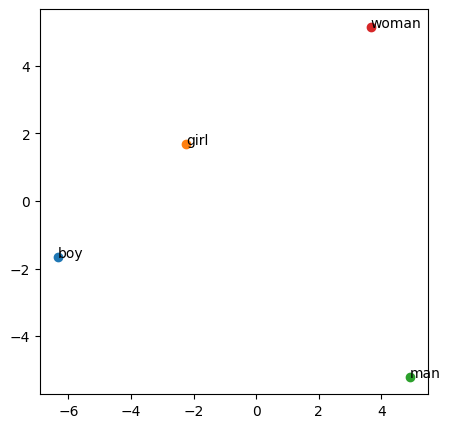

In [23]:
plot_subset(['boy', 'girl', 'man', 'woman'])

From what the plot shows, it seems like *gender* isn't their criteria for clustering the words, instead, categories of the words are the ones.

Now, we will try to prove the assumption by manually input a list of words belonging to different categories.

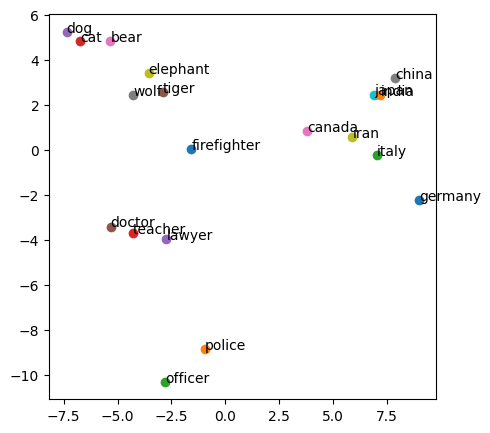

In [24]:
categories = [
    'firefighter', 'police', 'officer', 'teacher', 'lawyer','doctor',
    'canada', 'china', 'iran', 'japan', 'germany', 'india', 'italy',
    'cat', 'dog', 'tiger', 'bear', 'wolf', 'elephant'
]

plot_subset(categories)

From the plot, it seems like the clusters are not formed as ideally as what we might expect.

Supposedly, words with similar meanings should be positioned closer to each other.

While this model seems **not to be fully capable** with this job, even though **it did cluster some of the words correctly**.

We can now try to see whether any of the models are able to tell the difference among words' different types, e.g. *n., v., adj.*, etc.

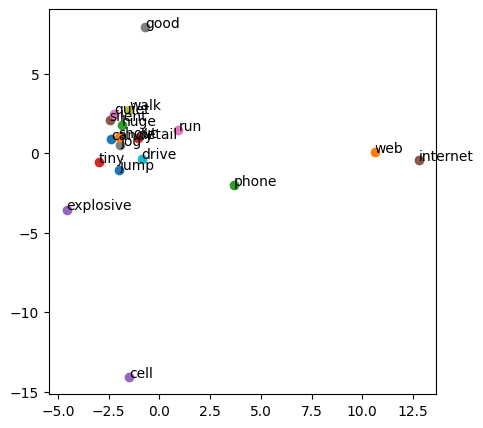

In [25]:
types = [
    'candy', 'web', 'phone', 'detail', 'cell', 'internet',
    'run', 'jog', 'walk', 'drive', 'jump', 'shout',
    'huge', 'tiny', 'explosive', 'silent', 'quiet', 'good'
]

plot_subset(types)

Unfortunately, it seems like the model doesn't do too well on clustering types of words either, and the performance is even a bit worse than the previous task.

Therefore, except using **text8**, we may try to use another corpus that probably brings a better result.

Here, we will choose to use **Google News Corpus**, which is one of the most commonly used, offering a large and diverse collection of news articles.

We'll firstly process the model, then replicate the process that's proceeded above.

In [26]:
from gensim.models import KeyedVectors

# The model has been pre-trained and available in Gensim
google_news_model = api.load("word2vec-google-news-300")

print(f"Google News Model's vector size is: {google_news_model.vector_size}.")
print(f"Google News Model's vocabulary size is: {len(google_news_model.key_to_index)} words.")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Google News Model's vector size is: 300.
Google News Model's vocabulary size is: 3000000 words.


Again, we could take some sample word vectors, and use `most_similar` function to find the words that are most similar to a given word.

In [27]:
google_news_model['happy']

array([-5.18798828e-04,  1.60156250e-01,  1.60980225e-03,  2.53906250e-02,
        9.91210938e-02, -8.59375000e-02,  3.24218750e-01, -2.17285156e-02,
        1.34765625e-01,  1.10351562e-01, -1.04980469e-01, -2.90527344e-02,
       -2.38037109e-02, -4.02832031e-02, -3.68652344e-02,  2.32421875e-01,
        3.20312500e-01,  1.01074219e-01,  5.83496094e-02, -2.91824341e-04,
       -3.29589844e-02,  2.11914062e-01,  4.32128906e-02, -8.59375000e-02,
        2.81250000e-01, -1.78222656e-02,  3.79943848e-03, -1.71875000e-01,
        2.06054688e-01, -1.85546875e-01,  3.73535156e-02, -1.21459961e-02,
        2.04101562e-01, -3.80859375e-02,  3.61328125e-02, -8.15429688e-02,
        8.44726562e-02,  9.37500000e-02,  1.44531250e-01,  7.42187500e-02,
        2.51953125e-01, -7.91015625e-02,  8.69140625e-02,  1.58691406e-02,
        1.09375000e-01, -2.23632812e-01, -5.15747070e-03,  1.68945312e-01,
       -1.36718750e-01, -2.51464844e-02, -3.85742188e-02, -1.33056641e-02,
        1.38671875e-01,  

In [28]:
google_news_model.most_similar('happy', topn = 6)

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896)]

In [29]:
google_news_model['school']

array([ 9.13085938e-02,  2.81982422e-02,  3.68652344e-02,  2.18750000e-01,
        9.76562500e-02, -6.59179688e-02,  1.56250000e-01, -4.68750000e-02,
       -4.66918945e-03, -9.08203125e-02,  2.49023438e-01,  4.56542969e-02,
        6.64062500e-02, -9.86328125e-02, -1.05957031e-01,  1.06445312e-01,
       -2.00195312e-01,  1.40991211e-02,  1.36718750e-01, -8.78906250e-02,
        2.05078125e-01,  1.70898438e-01,  1.16577148e-02,  1.71875000e-01,
        4.85229492e-03, -3.49609375e-01,  2.27355957e-03,  1.84570312e-01,
        1.19628906e-01, -2.51464844e-02,  1.02050781e-01, -1.06933594e-01,
        4.00390625e-02,  7.50732422e-03, -1.63085938e-01, -1.49414062e-01,
        2.28515625e-01, -5.02929688e-02,  4.63867188e-02,  1.25000000e-01,
        1.30615234e-02,  1.27929688e-01,  1.10351562e-01, -5.05371094e-02,
        3.44238281e-02,  1.44531250e-01,  1.71875000e-01, -2.78320312e-02,
       -1.10839844e-01,  2.29492188e-01, -1.17187500e-01, -1.22070312e-01,
       -3.55529785e-03, -

In [30]:
google_news_model.most_similar('school', topn = 6)

[('elementary', 0.7868632078170776),
 ('schools', 0.7411909103393555),
 ('shool', 0.6692329049110413),
 ('elementary_schools', 0.6597153544425964),
 ('kindergarten', 0.6529811024665833),
 ('eighth_grade', 0.6488089561462402)]

From these words' tryout, it brings us a positive feedback, and seems like this corpus will make the model performs better.

Again, we will extract word vectors and visualize them by using **PCA** (Principle Component Analysis).

For playing around with the model, we'll still use the `plot_subset(words)` function we defined above to directly run the *categories* and *types* groups of words to see the performance, and potentially see the difference compared with **text8**.

In [31]:
# Change some parameters of the function
def new_plot_subset(words):
  words_vector = []
  for word in words:
    if word in google_news_model:
      words_vector.append(google_news_model[word])

  pca = PCA(n_components=2)
  pca_result = pca.fit_transform(words_vector)

  plt.figure(figsize=(5, 5))
  for i, word in enumerate(words):
    plt.scatter(pca_result[i, 0], pca_result[i, 1])
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]))
  plt.show()

Since the model seems performing well in clustering words with relevance, we'll firstly test a subset with words that are grouped by their meanings' similarity.

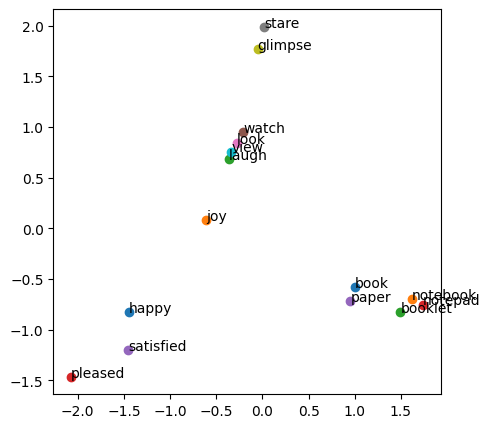

In [32]:
similar = [
    'happy', 'joy', 'laugh', 'pleased', 'satisfied',
    'watch', 'look', 'stare', 'glimpse', 'view',
    'book', 'notebook', 'booklet', 'notepad', 'paper'
]

new_plot_subset(similar)

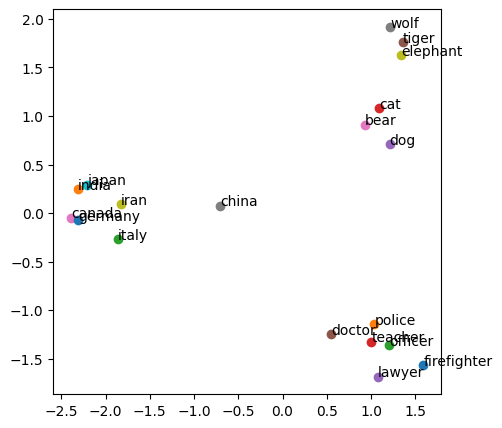

In [33]:
new_plot_subset(categories)

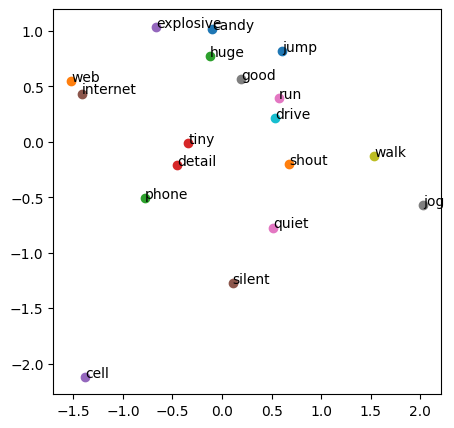

In [34]:
new_plot_subset(types)

From the output, even though it doesn't seem to be as idea as what we expect still, at least the clusters seem to be more clear and splitting apart compared with the previous model. With different subsets of more specific words used, we probably will obtain a better result.

-----------------------------------------

#### 2. GloVe Vectors Advanced Analysis (20 Points)

- **Task**: Analyze word relationships using pre-trained GloVe vectors.
- **Activity**: Conduct an analogy task (e.g., *king- man + woman = ?*) with examples.
- **Explanation**: Explain the results of the analogy tasks.

Firstly, we will import some relevant libraries and download some necessary resources before proceeding to the next step.

To load pre-trained **GloVe** embeddings, we'll use a package called `torchtext`.

Since the first question uses **Google News Corpus** with *300 dimension*, we'll set the dimension of **GloVe** as 300 too.

In [35]:
# Adjustment due to the difficulty of installing torchtext
# !pip install torch==2.5.1+cu124
# !pip install torchtext==0.16.1 --no-cache-dir
#
# This part is not fully leveraged
# since GPU limit was approached when doing the assignment
#

import torch
import torchtext

# Here we set the dimension as 300 to compare with the first question's output
glove = torchtext.vocab.GloVe(name="6B", dim=300)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

.vector_cache/glove.6B.zip: 862MB [02:38, 5.42MB/s]                           
100%|█████████▉| 399999/400000 [01:08<00:00, 5806.01it/s]


Let's take an overview of the corpus by looking into some samples.

In [39]:
glove['dog']

tensor([-1.1043e-01,  8.1217e-01,  7.3668e-02,  1.9023e-01, -5.2888e-02,
         6.1468e-02,  1.6076e-01,  4.1302e-01, -3.0199e-01, -9.0827e-01,
         2.7504e-01, -3.1890e-02, -2.8842e-01,  2.3447e-01,  4.7679e-01,
         5.0124e-01,  2.9371e-01,  2.7029e-01,  5.4745e-02,  9.8038e-02,
         5.7116e-01,  3.6755e-01,  4.0734e-02,  3.4347e-01, -1.8256e-01,
        -2.8935e-01,  2.3826e-02, -1.9401e-01,  2.4444e-01,  1.3407e-01,
        -1.6494e-01, -2.6983e-01, -2.6234e-01, -2.1779e-01, -8.7528e-01,
         7.3822e-01, -8.7931e-02, -1.0876e-02, -2.6540e-01,  3.4668e-01,
        -5.5814e-01,  1.7591e-01,  1.6926e-01, -1.5725e-01, -5.0430e-01,
        -2.0100e-01,  6.6701e-01, -3.2518e-02,  4.5012e-02,  6.5675e-02,
        -1.6061e-01, -7.3363e-01,  2.4642e-01,  3.4325e-01,  2.1899e-01,
         4.8646e-02, -5.9987e-01, -5.8153e-02, -5.1694e-02, -5.7846e-01,
         3.0000e-01,  3.5078e-01,  4.6646e-01, -7.5309e-03,  1.0455e-01,
        -5.1016e-01, -5.5987e-02, -1.0295e-01, -2.6

For the sake of exploring the structure of the embedding space, we could approach it by looking into the **distances**.

For example, we could use **Cosine Similarity** to measure the angle between two vectors, which shows a **closer** relationship when it's **larger**.

In [44]:
# unsqueeze(0) add a new dimension at position 0

torch.cosine_similarity(
    glove['college'].unsqueeze(0),
    glove['university'].unsqueeze(0)
)

tensor([0.6997])

For contrast, we can try to take a look at another pair of words:

In [53]:
torch.cosine_similarity(
    glove['cat'].unsqueeze(0),
    glove['kitten'].unsqueeze(0)
)

tensor([0.4305])

Intuitively, these two words are sharing the similar meanings. However, due to the circumstance of usage, their correlation is not as close as these pairs of words that occur in **similar contexts**.

By referring to the distance in embedding space, we can try to figure out how words are *close* to each other.

Here we will use **Euclidean Distance** by `torch.norm()` function.

Supposedly, **GloVe** vectors are trained on **word co-occurrences**, and so words with similar embeddings will tend to co-occure with other words.

In [45]:
# We set n as the number of the closest words
def close_word(vec, n):
  dist = torch.norm(glove.vectors - vec, dim = 1)
  # enumerate() generates tuples (index, value->[dist])
  lst = sorted(enumerate(dist.numpy()), key = lambda x: x[1])

  for idx, diff in lst[1:n+1]:
    # itos represents index to string
    print(glove.itos[idx], diff)

By defining a function manually above, we can start playing around by trying out different type of words.

In [48]:
close_word(glove['school'], 5)

schools 4.775013
students 5.2025175
elementary 5.2045426
college 5.4369864
teacher 5.8929214


In [49]:
close_word(glove['hospital'], 5)

hospitals 5.4280376
medical 5.6355314
clinic 5.7964478
doctors 6.0470476
doctor 6.458886


In [50]:
close_word(glove['computer'], 5)

computers 4.1790013
software 5.317317
technology 6.0971107
laptop 6.1493397
computing 6.1952305


We could also try to figure out which words are closest to the midpoint of two words.

In [52]:
close_word((glove['great'] + glove['awful']) / 2, 5)

awful 3.3279402
unfortunately 3.8606553
indeed 3.9429266
certainly 4.01489
really 4.140447


After exploring the word relationships, we start tackling the analogy task.

$king - man + woman ≈ queen$

Firstly, by using the function created above, we could expect to see **queen** being among the top of the words that has a high similarity.

In [54]:
close_word(glove['king'] - glove['man'] + glove['woman'], 5)

queen 5.955312
monarch 6.899857
mother 7.178615
princess 7.252288
daughter 7.277298


As what we expect, **queen** is the closest word for this analogy task.

Word analogies apparently refer to the property that certain semantic relationships among words can be captured, which can be realized by vector calculus.

For the example above, it is a.k.a. "king is to man as queen is to woman". As we know that the difference between *king* and *man* is the same as between *queen* and *woman*, which can be realized on vectors.

Now, we can try to slightly modify the function by changing the words to similar ones in different orders to see whether the output meets the expectations.

In [55]:
close_word(glove['queen'] - glove['woman'] + glove['man'], 5)

king 5.955312
majesty 7.0054083
monarch 7.009635
elizabeth 7.0191894
ii 7.06885


As what we expect, by flipping the roles, **king** turns to be the expected output.

In [57]:
close_word(glove['old'] - glove['young'] + glove['father'], 5)

father 7.0086503
grandfather 7.675826
mother 8.044649
son 8.118658
35-year 8.119358


From this example, we could see that two areas of words that are not much correlatable might not generate an ideal output.

We can try this conception in other areas, for example, *geography*, etc.

In [74]:
close_word(glove['canada'] - glove['ottawa'] + glove['china'], 5)

chinese 8.915638
mainland 9.191947
canada 9.259861
japan 9.282807
taiwan 9.306035


Apparently, we are expecting an answer like **Beijing**, while the output isn't as ideal as what we expect.

This is probably due to the limitation of word embedding, or the concept of *capital city* isn't an easy one for **GloVe**.

The examples above seem to be quite straightforward.

However, when we are facing the issue of **bias**, for example, **gender problem**, the analogy might bring up some concerning answers.

For example:

In [59]:
close_word(glove['doctor'] - glove['man'] + glove['woman'], 5)

physician 6.7226787
nurse 6.7791734
woman 6.8218
doctors 6.963807
dentist 7.3165383


The result $doctor - man + woman ≈ nurse$ is quite **biased** as we can see.

However, this issue probably not occure if we flip the gender.

In [60]:
close_word(glove['doctor'] - glove['woman'] + glove['man'], 5)

man 6.614642
physician 6.8267035
he 7.064041
mr. 7.065585
dr. 7.127458


We can try another occupation to see whether the similar problem exist, for example, **engineer**.

In [64]:
close_word(glove['engineer'] - glove['man'] + glove['woman'], 5)

technician 6.738221
engineers 7.143567
educator 7.160228
worker 7.294498
woman 7.3743315


In [65]:
close_word(glove['engineer'] - glove['woman'] + glove['man'], 5)

engineers 7.340744
mechanic 7.6183243
engineering 7.689247
worked 7.8743134
technician 7.9948106


As we can see, **educator** appears in the first output, but not the second, which could be treated as a **bias**.

Similarly, we can try another word: **superman**.

In [61]:
close_word(glove['superman'] - glove['man'] + glove['woman'], 5)

supergirl 6.658719
superboy 7.0202036
superhero 7.232414
batman 7.3671317
lois 7.3717175


In [62]:
close_word(glove['superman'] - glove['woman'] + glove['man'], 5)

superhero 7.6049876
batman 7.654928
villain 7.8947144
superboy 8.037553
superheroes 8.193394


As we can see, some output like *superboy* in the first half doesn't seem to make too much sense. We could slightly observe the existence of bias here.

-----------------------------------------

#### 3. Semantic and Syntactic Word Relationships (10 Points)

- **Comparison**: Evaluate Word2Vec and GloVe for capturing semantic and syntactic relationships.
- **Illustration**: Use specific word pairs or groups to demonstrate differences in representation by each model.

Since we foresee the 300 dimension's same-size embedding space in the first two questions, we will compare **GloVe** model with **Word2Vec** model trained by *Google News* corpus.

For the sake of comparing the performance on both capturing semantic and syntactic relationships, here we create a syntactic word subset specifically.

In [75]:
syntactic = [
    # verb
    'run', 'walk', 'jump', 'sprint', 'jog',
    # adj
    'big', 'huge', 'large', 'enormous', 'gigantic',
    # preposition
    'in', 'on', 'under', 'over', 'beside'
]

Now we can use *visualization* to compare two models to see which one performs better.

Firstly, we will give **GloVe** model a *PCA* visualization function too.

In [100]:
def plot_glove_subset(words):
    words_vector = []

    for word in words:
      words_vector.append(glove[word])

    words_vector = torch.stack(words_vector).numpy()
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(words_vector)

    plt.figure(figsize=(5, 5))
    for i, word in enumerate(words):
        plt.scatter(pca_result[i, 0], pca_result[i, 1])
        plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]))

    plt.show()

Firstly, let's see plots' comparison on *semantic* subset:

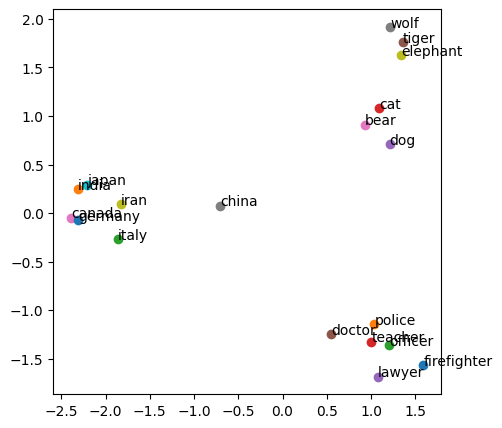

In [101]:
new_plot_subset(categories)

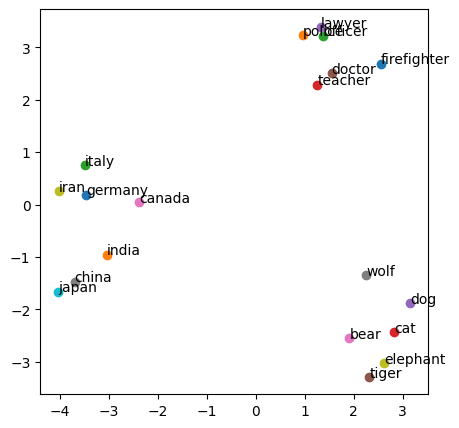

In [102]:
plot_glove_subset(categories)

From using `categories` subset, **GloVe** seems to perform better, as the word `china` is also well clustered, while it's not in **Word2Vec**.

We can also try other subsets:

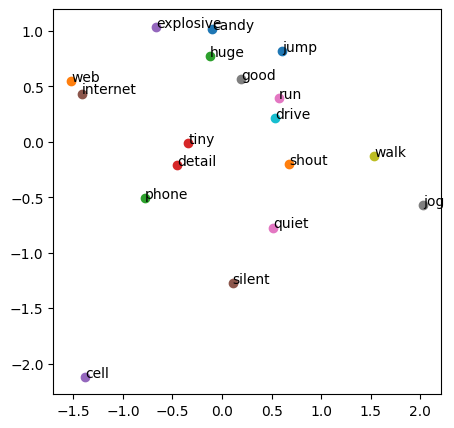

In [103]:
new_plot_subset(types)

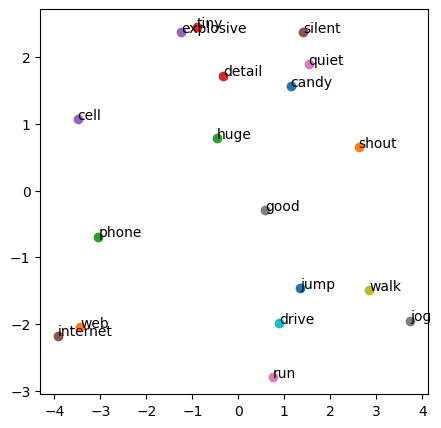

In [104]:
plot_glove_subset(types)

For `types`, neither of them seems completed a decent job, while **GloVe** seems to cluster part of the subset well, for example, the lower right corner of the plot.

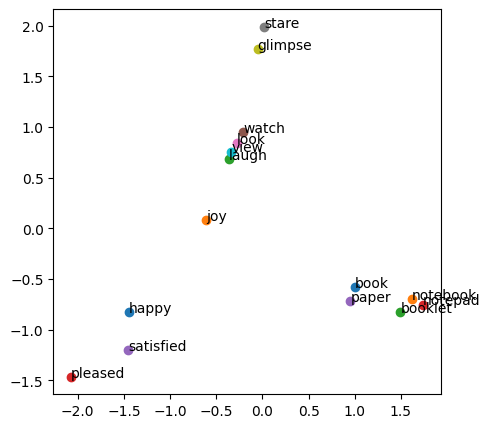

In [105]:
new_plot_subset(similar)

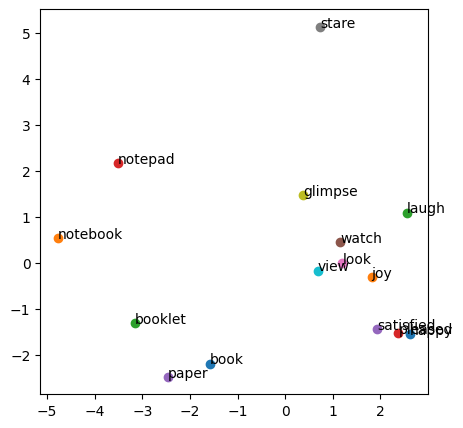

In [106]:
plot_glove_subset(similar)

For `similar` subset, we are facing a plot twist: **Word2Vec** is performing better than **GloVe**, as the clustering task seems to be completed in a better way.

As we can see, there seems to *not have a absolute answer that which model performs better*.

Now we look into syntactic relationship's comparison:

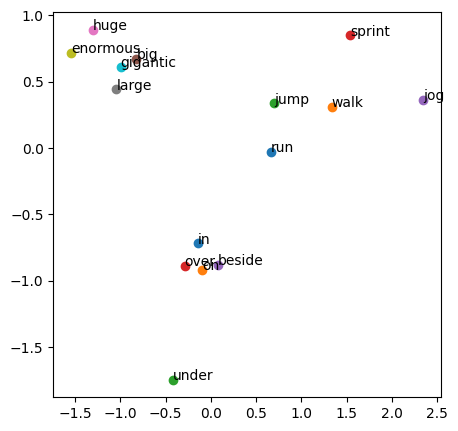

In [107]:
new_plot_subset(syntactic)

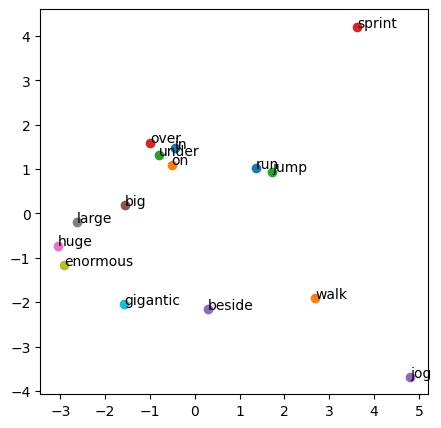

In [108]:
plot_glove_subset(syntactic)

We have to admit that both are doing a not bad job. However, **Word2Vec** seems to cluster 3 groups clearer compared with **GloVe**, especially on *verbs* subgroup.

In addition, we can also look into *analogy* to see their performances' comparison.

Firstly, we need to write a `close_word()` function for **Word2Vec** model too.

In [110]:
def close_word_w2v(vec, n):
    dist = {word: np.linalg.norm(google_news_model[word] - vec)
            for word in google_news_model.key_to_index}

    lst = sorted(dist.items(), key=lambda x: x[1])

    for word, diff in lst[1:n+1]:
        print(word, diff)

Now we can give a sample for tryout:

$king - man + woman ≈ queen$

In [111]:
close_word_w2v(google_news_model["king"] - google_news_model["man"] + google_news_model["woman"], 5)

queen 2.2986577
Prince_Paras 2.758862
Princess_Sikhanyiso 2.7791162
Queen_Consort 2.7801094
very_pampered_McElhatton 2.7926178


The first output looks good at the moment, while the others looks quite unique compared with **GloVe**.

In [114]:
close_word_w2v(google_news_model['canada'] - google_news_model['ottawa'] + google_news_model['china'], 5)

canada 3.9868996
crystal_stemware 4.620416
chinese 4.6719832
china_plates 4.6826296
india 4.694521


Unfortunately, **Word2Vec** didn't successfully make it on the *capital city* problem either.

For a more straightforward comparison, we could make a bar plot to visualize their performances' comparisons on each pair of the sample we manually give for **similarity**, where we will use **cosine similarity** here.

In [115]:
# Define word pairs
word_pairs = [
    ("king", "queen"),
    ("man", "woman"),
    ("cat", "dog"),
    ("apple", "orange"),
    ("car", "bus"),
    ("happy", "joy"),
    ("big", "huge")
]

# Compute cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Compute cosine similarity for a list of word pairs
def get_similarity_scores(model, word_pairs, model_type="glove"):
    scores = []
    for w1, w2 in word_pairs:
      if model_type == "glove":
        if w1 in glove.stoi and w2 in glove.stoi:
            vec1 = glove.vectors[glove.stoi[w1]].numpy()
            vec2 = glove.vectors[glove.stoi[w2]].numpy()
            scores.append(cosine_similarity(vec1, vec2))
        else:
          # Handle missing words
          scores.append(None)

      # Word2Vec
      else:
        if w1 in model and w2 in model:
            vec1 = model[w1]
            vec2 = model[w2]
            scores.append(cosine_similarity(vec1, vec2))
        else:
            scores.append(None)
    return scores

In [116]:
w2v_similarities = get_similarity_scores(google_news_model, word_pairs, "w2v")
glove_similarities = get_similarity_scores(glove, word_pairs, "glove")

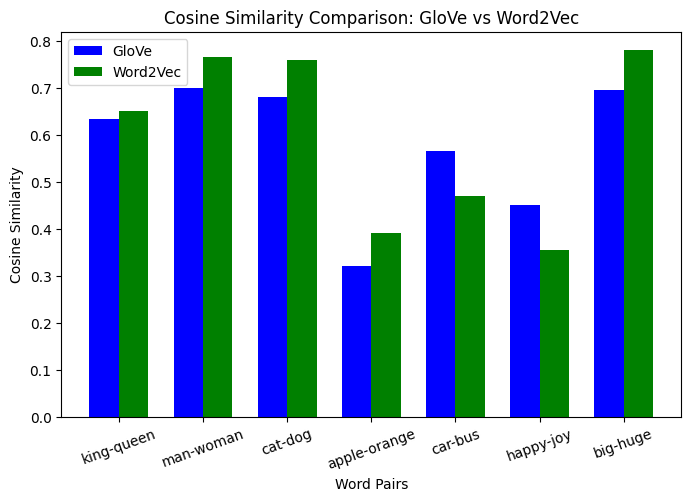

In [120]:
x_labels = [f"{w1}-{w2}" for w1, w2 in word_pairs]
x = np.arange(len(x_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, glove_similarities, width, label="GloVe", color="blue")
rects2 = ax.bar(x + width/2, w2v_similarities, width, label="Word2Vec", color="green")

ax.set_ylabel("Cosine Similarity")
ax.set_xlabel("Word Pairs")
ax.set_title("Cosine Similarity Comparison: GloVe vs Word2Vec")
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=20)
ax.legend()

plt.show()

From what we could observe, **Word2Vec** model seems to perform better generally, which probably means that the pairs of words we manually set here are having a closer distance between each other compared with **GloVe** vector space.

However, this couldn't be a conclusive result, since we only spot-checked a limited number of word pairs.